# Introduction to Decision Tree and Random Forest

In this notebook we will learn how to build a Decision tree and Random Forest in R.

Before working with Decision Tree or Random Forest, the first and foremost requirement is to install packages. Install the `rpart` packages using `install.packages("rpart")` and `install.packages("rpart.plot")` for plotting of the Decision Tree.

You will also need to install the Random Forest package using `install.packages("randomForest")`

With that said, sit back tight and enjoy the ride.

# Table of Contents <a name="table"/>

1. [Import Libraries](#import)
2. [Load the Dataset](#load_data)
3. [Fit a Decision Tree Model](#fit_model)
    - [Plot a Decision Tree](#plot_tree)
    - [Print the Decision Tree Table](#decision_tree_table)
4. [Fit a Random Forest](#rf)
    - [Get the predicted values](#rf_predicted)
    - [Get the number of fitted Trees](#n_fitted_trees)
    - [Print the Confusion Matrix](#confusion)

# Import Libraries <a name="import"/>

In [21]:
library(rpart)
library(rpart.plot)
library(randomForest)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.



In [3]:
help(rpart)

rpart {rpart},R Documentation
formula,"a formula, with a response but no interaction terms. If this is a data frame, it is taken as the model frame (see model.frame)."
data,an optional data frame in which to interpret the variables named in the formula.
weights,optional case weights.
subset,optional expression saying that only a subset of the rows of the data should be used in the fit.
na.action,"the default action deletes all observations for which y is missing, but keeps those in which one or more predictors are missing."
method,"one of ""anova"", ""poisson"", ""class"" or ""exp"". If method is missing then the routine tries to make an intelligent guess. If y is a survival object, then method = ""exp"" is assumed, if y has 2 columns then method = ""poisson"" is assumed, if y is a factor then method = ""class"" is assumed, otherwise method = ""anova"" is assumed. It is wisest to specify the method directly, especially as more criteria may added to the function in future. Alternatively, method can be a list of functions named init, split and eval. Examples are given in the file ‘tests/usersplits.R’ in the sources, and in the vignettes ‘User Written Split Functions’."
model,"if logical: keep a copy of the model frame in the result? If the input value for model is a model frame (likely from an earlier call to the rpart function), then this frame is used rather than constructing new data."
x,keep a copy of the x matrix in the result.
y,keep a copy of the dependent variable in the result. If missing and model is supplied this defaults to FALSE.
parms,"optional parameters for the splitting function. Anova splitting has no parameters. Poisson splitting has a single parameter, the coefficient of variation of the prior distribution on the rates. The default value is 1. Exponential splitting has the same parameter as Poisson. For classification splitting, the list can contain any of: the vector of prior probabilities (component prior), the loss matrix (component loss) or the splitting index (component split). The priors must be positive and sum to 1. The loss matrix must have zeros on the diagonal and positive off-diagonal elements. The splitting index can be gini or information. The default priors are proportional to the data counts, the losses default to 1, and the split defaults to gini."


# Load the Dataset <a name="load_data"/>

[Jump to the Table of Contents](#table)

In [5]:
data = kyphosis
head(data, 5)

,Kyphosis,Age,Number,Start
,<fct>,<int>,<int>,<int>
1,absent,71,3,5
2,absent,158,3,14
3,present,128,4,5
4,absent,2,5,1
5,absent,1,4,15


In [7]:
str(data)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


In [8]:
summary(data)

    Kyphosis       Age             Number           Start      
 absent :64   Min.   :  1.00   Min.   : 2.000   Min.   : 1.00  
 present:17   1st Qu.: 26.00   1st Qu.: 3.000   1st Qu.: 9.00  
              Median : 87.00   Median : 4.000   Median :13.00  
              Mean   : 83.65   Mean   : 4.049   Mean   :11.49  
              3rd Qu.:130.00   3rd Qu.: 5.000   3rd Qu.:16.00  
              Max.   :206.00   Max.   :10.000   Max.   :18.00  

# Fit a Decision Tree Model <a name="fit_model"/>
[Jump tp the Table of Contents](#table)

In [9]:
tree <- rpart(Kyphosis~., method='class', data=data)

## Plot a Decision Tree <a name="plot_tree"/>
[Jump tp the Main Heading](#fit_model)

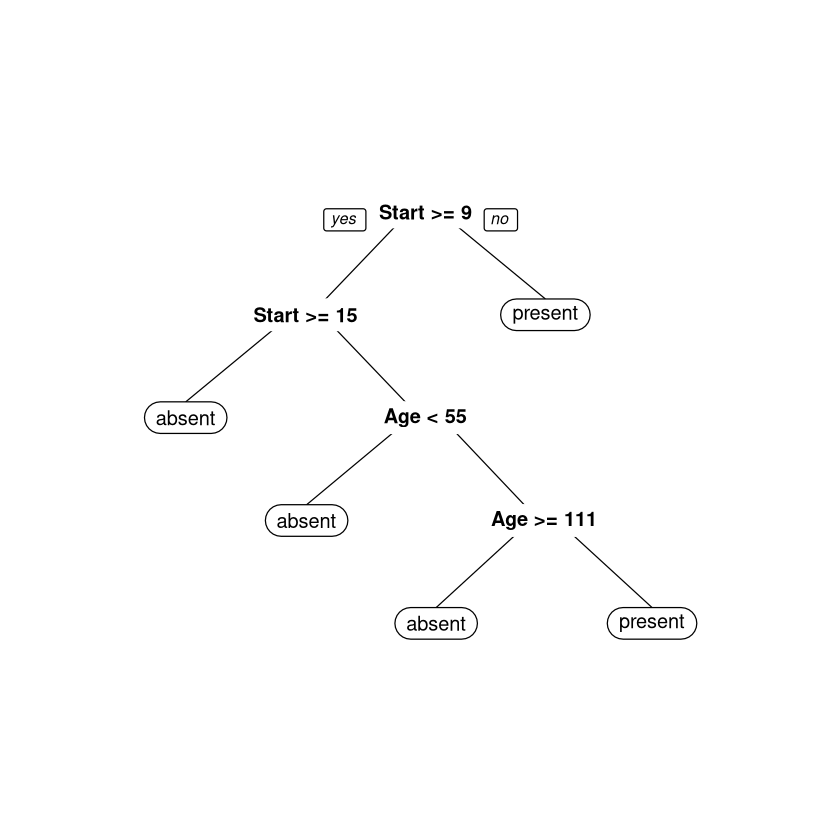

In [19]:
prp(tree)

## Print the Decision Tree Table <a name="decision_tree_table"/>
[Jump to the Main Heading](#fit_model)

In [16]:
printcp(tree)


Classification tree:
rpart(formula = Kyphosis ~ ., data = data, method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error xerror    xstd
1 0.176471      0   1.00000 1.0000 0.21559
2 0.019608      1   0.82353 1.0588 0.22010
3 0.010000      4   0.76471 1.1176 0.22433


# Fit a Random Forest <a name="rf"/>

[Jump to the Table of Contents](#table)

In [22]:
rf.model = randomForest(Kyphosis ~ ., data=data)

In [23]:
print(rf.model)


Call:
 randomForest(formula = Kyphosis ~ ., data = data) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 19.75%
Confusion matrix:
        absent present class.error
absent      60       4   0.0625000
present     12       5   0.7058824


## Get the predicted values <a name="rf_predicted"/>

[Jump to the Main Heading](#rf)

In [25]:
rf.model$predicted

1       2       3       4       5       6       7       8       9      10 
present  absent present  absent  absent  absent  absent  absent  absent  absent 
     11      12      13      14      15      16      17      18      19      20 
 absent  absent  absent  absent  absent  absent  absent  absent  absent  absent 
     21      22      23      24      25      26      27      28      29      30 
 absent present  absent present  absent  absent  absent  absent  absent  absent 
     31      32      33      34      35      36      37      38      39      40 
 absent  absent  absent  absent  absent  absent  absent  absent  absent  absent 
     41      42      43      44      45      46      47      48      49      50 
 absent  absent present  absent  absent  absent  absent  absent  absent  absent 
     51      52      53      54      55      56      57      58      59      60 
 absent  absent  absent  absent  absent  absent  absent present present  absent 
     61      62      63      64      65      66      67      68      69      70 
 absent present  absent  absent  absent  absent  absent  absent  absent  absent 
     71      72      73      74      75      76      77      78      79      80 
 absent  absent  absent  absent  absent  absent  absent  absent  absent present 
     81 
 absent 
Levels: absent present

## Get the number of fitted trees <a name="n_fitted_trees"/>

[Jump to the Main Heading](#rf)

In [26]:
rf.model$ntree

[1] 500

## Print the Confusion Matrix <a name="confusion"/>

[Jump to the main heading](#rf)

In [27]:
rf.model$confusion

,absent,present,class.error
absent,60,4,0.0625000
present,12,5,0.7058824
